# These equations came from (Henrique, 2011), a master thesis

## Load required libraries

In [1]:
from sympy import *
from sympy.abc import t
init_printing()

## State and control variables declaration
## Linear positions and their velocities

In [2]:
U, V, W, X, Y, Z = symbols('U V W X Y Z', real = True)

### Angle and their velocities

In [3]:
P, Q, R, phi, theta, psi = symbols('P Q R \\phi \\theta \\psi', real = True)

### Control variables
$\omega_1$ is the motor 1 velocity (rad/s) <br>
$\omega_2$ is the motor 2 velocity (rad/s) <br>
$\omega_3$ is the motor 3 velocity (rad/s) <br>
$\omega_4$ is the motor 4 velocity (rad/s) <br>

In [4]:
w1, w2, w3, w4 = symbols('\\omega_1 \\omega_2 \\omega_3 \\omega_4', real = True)
w = [w1, w2, w3, w4]

# Parameters

In [5]:
Mx, My, Mz = symbols('M_x M_y M_z', real = True) # Net Moment
Ix, Iy, Iz = symbols('I_x I_y I_z', real = True) # Moment of Intertia
g = symbols('g', real = True) # Gravity
Kt = symbols('K_T', real = True) # constants of propellers
Km = symbols('K_M', real = True) # constants of propellers
dcm = symbols('d_{cm}', real = True) # distance from sensor to the center of mass
m = symbols('m', real = True) # mass of quad
rx = symbols('r_x', real = True) # distance from accelerometer to center of mass
ry = symbols('r_y', real = True) # distance from accelerometer to center of mass
rz = symbols('r_z', real = True) # distance from accelerometer to center of mass
acc_ux = symbols('\mu_{ax}', real = True) # Accelerometer noise for channel x
acc_uy = symbols('\mu_{ay}', real = True)
acc_uz = symbols('\mu_{az}', real = True)
acc_uphi = symbols('\mu_{a\phi}', real = True)
acc_bphi = symbols('b_{a\phi}', real = True)
acc_utheta = symbols('\mu_{a\Theta}', real = True)
acc_btheta = symbols('b_{a\Theta}', real = True)
compass_ux = symbols('\mu_{cx}', real = True) # Compass noise for channel x
compass_uy = symbols('\mu_{cy}', real = True)
compass_uz = symbols('\mu_{cz}', real = True)
compass_bx = symbols('b_{cx}', real = True) # Compass bias for channel x
compass_by = symbols('b_{cy}', real = True)
compass_bz = symbols('b_{cz}', real = True)
compass_upsi = symbols('\mu_{c\psi}', real = True)
compass_bpsi = symbols('b_{c\psi}', real = True)
gyro_ux = symbols('\mu_{gx}', real = True) # Gyroscope noise for channel x
gyro_uy = symbols('\mu_{gy}', real = True)
gyro_uz = symbols('\mu_{gz}', real = True)
gyro_bx = symbols('b_{gx}', real = True) # Gyroscope bias for channel x
gyro_by = symbols('b_{gy}', real = True)
gyro_bz = symbols('b_{gz}', real = True)
bar_u  = symbols('\mu_{bz}', real = True) # Barometer noise for channel x
local_altitude = symbols('lc', real = True)

In [6]:
parameters = {rx:9.2e-3, 
              ry:12.6e-3,
              rz:52.5e-3}

# Nonlinear equations

### Dynamics of the quadrotor concerning the rotations

In [7]:
dP = (w2**2 -w4**2)*Kt*dcm/Ix -(Iz-Iy)*Q*R/Ix
dQ = (w1**2 -w3**2)*Kt*dcm/Iy -(Ix-Iz)*P*R/Iy
dR = (w1**2 -w2**2 +w3**2 -w4**2)*Km/Iz -(Iy-Ix)*P*Q/Iz

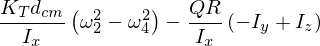

In [8]:
dP

### Angular velocities earth frame

In [9]:
dphi = P +Q*tan(theta)*sin(phi) +R*tan(theta)*cos(phi)
dtheta=Q*cos(phi) -R*sin(phi)
dpsi = Q*sin(phi)/cos(theta) +R*cos(phi)/cos(theta)

### Some other nice comment

In [10]:
dU = -g*sin(theta) -Q*W +R*V
dV = g*cos(theta)*sin(phi) +R*U -P*W
dW = -(Kt/m)*(w1**2 +w2**2 +w3**2 +w4**2) +g*cos(theta)*cos(phi) -P*V +Q*U

### Some other nice comment

In [11]:
dX = U*cos(theta)*cos(psi) +V*(sin(psi)*sin(theta)*cos(psi)-cos(phi)*sin(psi)) +W*(cos(phi)*sin(theta)*cos(psi)+sin(phi)*sin(psi))
dY = U*cos(theta)*sin(psi) +V*(cos(phi)*cos(psi)+sin(phi)*sin(theta)*sin(psi)) +W*(sin(theta)*cos(phi)*sin(psi)-sin(phi)*cos(psi))
dZ = -U*sin(theta) +V*sin(phi)*cos(theta) +W*cos(theta)*cos(phi)

# Obtaining a linear model with 12 states
State vector: <br>
$x = \left[ \begin{array}{cccccccccccc} U & V & W & P & Q & R & X & Y & Z & \phi & \theta & \psi \end{array} \right]^T$

In [12]:
x =  [U, V, W, P, Q, R, X, Y,  Z, phi, theta, psi]
dx = [dU, dV, dW, dP, dQ, dR, dX, dY, dZ, dphi, dtheta, dpsi]

# Obtaining a linear model with 8 states
State vector: <br>
$x = \left[ \begin{array}{cccccccccccccc}W & P & Q & R & Z & \phi & \theta & \psi \end{array} \right]^T$

In [13]:
x =  [ W,  P,  Q,  R,  Z,  phi,  theta,  psi]
dx = [dW, dP, dQ, dR, dZ, dphi, dtheta, dpsi]

# Obtaining a linear model with 6 states (hover)
State vector: <br>
$x = \left[ \begin{array}{cccccccccccccc}P & Q & R & \phi & \theta & \psi \end{array} \right]^T$

In [14]:
x =  [ P,  Q,  R,  phi,  theta,  psi]
dx = [dP, dQ, dR, dphi, dtheta, dpsi]

# Obtaining a linear model with 3 states (angular velocities)
State vector: <br>
$x = \left[ \begin{array}{ccc}P & Q & R \end{array} \right]^T$

In [15]:
x_vel =  [ P,  Q,  R]
dx_vel = [dP, dQ, dR]

# Obtaining a linear model with 3 states (angular positions)
State vector: <br>
$x = \left[ \begin{array}{ccc} \phi & \theta & \psi \end{array} \right]^T$

In [16]:
x_pos =  [ phi,  theta,  psi]
dx_pos = [dphi, dtheta, dpsi]

# Initial condition ($x_{eq}$)

In [17]:
xeq = {U:0, V:0, W:0, P:0, Q:0, R:0, X:0, Y:0, Z:Z, phi:0, theta:0, psi:0}

# Python matrix coder (make life easier)

In [18]:
def MatrixCoder(Matrix, name):
    for i in range(0,Matrix.shape[0]):
        for j in range(0,Matrix.shape[1]):
            print name+'['+str(i)+','+str(j)+'] =', Matrix[i,j]

# Calculating $w$ for a initial condition

In [19]:
temp = dW.subs(xeq)
temp = temp.subs({w2:w1, w3:w1, w4:w1})
w0 = solve(temp,w1)[1]
w0 = float(w0.subs({g:10.05,m:1.75,Kt:3.13e-5}))
weq= dict({w1:w0, w2:w0, w3:w0, w4:w0})

## Obtain a linear model

In [20]:
A = zeros(len(x), len(x))
B = zeros(len(x), len(w))
for i,equation in enumerate(dx):
    for j,xj in enumerate(x):
        A[i,j] = equation.diff(xj)
for i,equation in enumerate(dx):
    for j,u in enumerate(w):
        B[i,j] = equation.diff(u)

# Replace the equilibrium point xeq to A,B matrices 
#A = A.subs(xeq)
#B = B.subs(weq)

In [21]:
w

## Obtain a linear model for the velocity and position separately

In [22]:
# Obtain the linear velocity model (P, Q and R are state variables)
A_vel = zeros(len(x_vel), len(x_vel))
B_vel = zeros(len(x_vel), len(w))
for i,equation in enumerate(dx_vel):
    for j,xj in enumerate(x_vel):
        A_vel[i,j] = equation.diff(xj)
for i,equation in enumerate(dx_vel):
    for j,u in enumerate(w):
        B_vel[i,j] = equation.diff(u)

vel = [P, Q, R]
# Obtain the linear velocity model (phi, theta and psi are state variables)
A_pos = zeros(len(x_pos), len(x_pos))
B_pos = zeros(len(x_pos), len(vel))
for i,equation in enumerate(dx_pos):
    for j,xj in enumerate(x_pos):
        A_pos[i,j] = equation.diff(xj)
for i,equation in enumerate(dx_pos):
    for j,u in enumerate(vel):
        B_pos[i,j] = equation.diff(u)

# Replace the equilibrium point xeq to A,B matrices 
#A = A.subs(xeq)
#B = B.subs(weq)

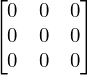

In [23]:
A_pos.subs({P:0, Q:0, R:0})

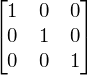

In [24]:
B_pos.subs({phi:0, theta:0, psi:0})

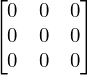

In [25]:
A_pos.subs(xeq)

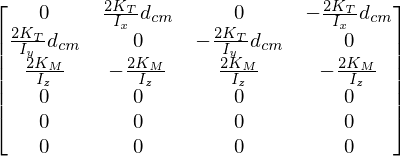

In [26]:
B.subs(xeq)*diag(w1**-1,w2**-1,w3**-1,w4**-1)

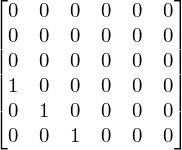

In [27]:
A.subs({theta:0, phi:0, psi:0, P:0, Q:0, R:0})

# Non linear equations for sensors

### Accelerometer

In [28]:
ax = -g*sin(theta)          +dQ*rz -dR*ry +Q*(P*ry-Q*rx) -R*(R*rx-P*rz) +acc_ux
ay =  g*cos(theta)*sin(phi) +dR*rx -dP*rz +R*(Q*rz-R*ry) -P*(P*ry-Q*rx) +acc_uy
az =  g*cos(theta)*cos(phi) +dP*ry -dQ*rx +P*(R*rx-P*rz) -Q*(Q*rz-R*ry) +acc_uz
phi_m = phi + acc_uphi + acc_bphi
theta_m = theta + acc_utheta + acc_btheta

### Compass

In [29]:
Nx =  cos(theta)*cos(psi) +compass_ux +compass_bx
Ny =  cos(psi)*sin(phi)*sin(theta) - cos(phi)*sin(psi) +compass_uy +compass_by
Nz =  cos(psi)*cos(phi)*sin(theta) + sin(phi)*sin(psi) + compass_uz +compass_bz
psi_m = psi +compass_upsi +compass_bpsi

### Gyroscope

In [30]:
gx = P +gyro_ux +gyro_bx
gy = Q +gyro_uy +gyro_by
gz = R +gyro_uz +gyro_bz

### Barometer

In [31]:
bz = Z + bar_u + local_altitude

### C and D matrices

In [32]:
y = [gx, gy, gz, phi_m, theta_m, psi_m, bz]
y = [gx, gy, gz, phi_m, theta_m, psi_m]

In [33]:
C = zeros(len(y), len(x))
D = zeros(len(y), len(w))
for i,output in enumerate(y):
    for j,xj in enumerate(x):
        C[i,j] = output.diff(xj)
for i,output in enumerate(y):
    for j,u in enumerate(w):
        D[i,j] = output.diff(u)

# Replace the equilibrium point xeq to A,B matrices 
C = C.subs(xeq)
D = D.subs(xeq)

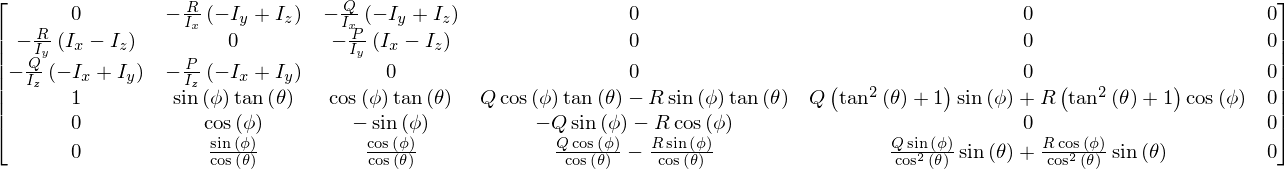

In [34]:
A

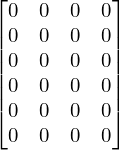

In [35]:
simplify(D*diag(w1**-1,w2**-1,w3**-1,w4**-1))

In [36]:
MatrixCoder(simplify(D*diag(w1**-1,w2**-1,w3**-1,w4**-1)), 'D')

D[0,0] = 0
D[0,1] = 0
D[0,2] = 0
D[0,3] = 0
D[1,0] = 0
D[1,1] = 0
D[1,2] = 0
D[1,3] = 0
D[2,0] = 0
D[2,1] = 0
D[2,2] = 0
D[2,3] = 0
D[3,0] = 0
D[3,1] = 0
D[3,2] = 0
D[3,3] = 0
D[4,0] = 0
D[4,1] = 0
D[4,2] = 0
D[4,3] = 0
D[5,0] = 0
D[5,1] = 0
D[5,2] = 0
D[5,3] = 0
